This is the simple workflow with graph

In [1]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    return input2 + " and am from second function"

In [2]:
from langgraph.graph import Graph

In [3]:
workflow1 = Graph()

In [4]:
workflow1.add_node("function1", function1)
workflow1.add_node("function2", function2)

In [5]:
workflow1.add_edge("function1", "function2")

In [6]:
workflow1.set_entry_point("function1")

In [7]:
workflow1.set_finish_point("function2")

In [8]:
app1 = workflow1.compile()

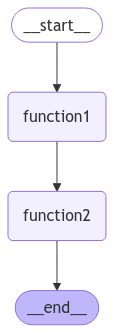

In [9]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [11]:
app1.invoke("Hi this is sowmya ")

'Hi this is sowmya from first function and am from second function'

In [13]:
input = "Hi this is sowmya "

for output in app1.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("---")
        print(value)
        print("\n")

here is output from function1
---
Hi this is sowmya from first function


here is output from function2
---
Hi this is sowmya from first function and am from second function




---------------------------------------

In [26]:
def function3(input3):
    return input3

In [27]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output = function3("this is function3 inbetween")
    return input2 + " " + output + " and am from second function"

In [28]:
workflow2 = Graph()

In [29]:
workflow2.add_node("function1", function1)
workflow2.add_node("function2", function2)

In [30]:
workflow2.add_edge("function1", "function2")

In [31]:
workflow2.set_entry_point("function1")

In [32]:
app2 = workflow2.compile()

In [33]:
input = "hi this is sowmya "

for output in app2.stream(input):
    for key, value in output.items():
        print(f"here is output from{key}")
        print("----")
        print(value)
        print("\n")

here is output fromfunction1
----
hi this is sowmya from first function


here is output fromfunction2
----
hi this is sowmya from first function this is function3 inbetween and am from second function




-------

Now lets create workflow with llm

In [35]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

from langchain_groq import ChatGroq
llm = ChatGroq(model="gemma2-9b-it")

In [36]:
def function1(input):
    llm = ChatGroq(model="gemma2-9b-it")
    response = llm.invoke(input).content
    return response

In [37]:
def function2(input):
    return input.upper()

In [43]:
from langgraph.graph import Graph

workflow2 = Graph()

In [44]:
workflow2.add_node("llm", function1)
workflow2.add_node("upper_string", function2)

In [45]:
workflow2.add_edge("llm", "upper_string")

In [46]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [47]:
app2 = workflow2.compile()

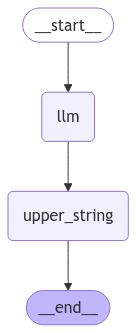

In [48]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [49]:
app2.invoke("who is the indian iron man?")

'THE "INDIAN IRON MAN" IS A NICKNAME FOR **DR. APJ ABDUL KALAM**. \n\nHE WAS A RENOWNED AEROSPACE SCIENTIST AND THE 11TH PRESIDENT OF INDIA. \n\nHE EARNED THIS NICKNAME DUE TO HIS SIGNIFICANT CONTRIBUTIONS TO INDIA\'S MISSILE AND SPACE PROGRAMS, OFTEN BEING REFERRED TO AS THE "MISSILE MAN OF INDIA".\n'

In [50]:
print(app2.invoke("what is genai explain in detail?"))

LET'S BREAK DOWN GENAI, OR GENERATIVE ARTIFICIAL INTELLIGENCE:

**WHAT IS IT?**

GENAI IS A TYPE OF ARTIFICIAL INTELLIGENCE THAT FOCUSES ON CREATING NEW CONTENT.  THINK OF IT AS A COMPUTER PROGRAM THAT CAN LEARN PATTERNS AND STRUCTURES WITHIN EXISTING DATA AND THEN USE THAT KNOWLEDGE TO GENERATE SOMETHING ORIGINAL. THIS "SOMETHING" CAN TAKE MANY FORMS:

* **TEXT:**  WRITING STORIES, POEMS, ARTICLES, DIALOGUE, CODE, AND EVEN ENTIRE BOOKS.
* **IMAGES:**  CREATING PAINTINGS, PHOTOGRAPHS, ILLUSTRATIONS, LOGOS, AND OTHER VISUAL CONTENT.
* **AUDIO:**  COMPOSING MUSIC, GENERATING SOUND EFFECTS, AND EVEN MIMICKING VOICES.
* **VIDEO:**  GENERATING SHORT CLIPS, ANIMATIONS, AND EVEN ENTIRE FILMS (THOUGH THIS IS STILL A DEVELOPING AREA).
* **3D MODELS:**  DESIGNING OBJECTS AND ENVIRONMENTS FOR GAMING, ARCHITECTURE, OR PRODUCT DESIGN.

**HOW DOES IT WORK?**

AT ITS CORE, GENAI RELIES ON POWERFUL MACHINE LEARNING ALGORITHMS, PARTICULARLY A TYPE CALLED **DEEP LEARNING**. THESE ALGORITHMS ARE TRAINED 

In [53]:
input = "who is the first prime minister in india?"

for output in app2.stream(input):
    for key, value in output.items():
        print(f"here is output from `{key}`")
        print("----")
        print(value)
        print("\n")

here is output from `llm`
----
The first Prime Minister of India was **Jawaharlal Nehru**. 



here is output from `upper_string`
----
THE FIRST PRIME MINISTER OF INDIA WAS **JAWAHARLAL NEHRU**. 





----------

Here lets create our own output token counter

In [54]:
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number = f"total token number is {token_number}"
    return token_number

In [55]:
workflow3 = Graph()

workflow3.add_node("llm", function1)
workflow3.add_node("token_counter", function3)

workflow3.add_edge("llm", "token_counter")

workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")

app3 = workflow3.compile()

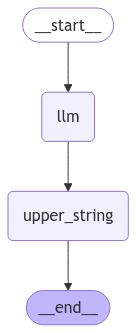

In [56]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [57]:
app3.invoke("who is the first prime minister in india?")

'total token number is 9'

In [58]:
app3.invoke("what is genai explain in detail?")

'total token number is 440'